In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
PATH = "stars.csv"
COLUMNS_FOR_FACTORISATION = ["Spectral Class"]

dataset = pd.read_csv(PATH)
factorization_table = {}

dataset.drop(
    [
        "Absolute magnitude(Mv)",
        "Star type",
        "Star color",
    ],
    axis=1,
    inplace=True,
)

for column in dataset.columns:
    if column in COLUMNS_FOR_FACTORISATION:
        dataset[column], table = pd.factorize(dataset[column])
        factorization_table[column] = pd.DataFrame(
            columns=[column],
            data=table
        )

dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Spectral Class
0,3068,0.002400,0.1700,0
1,3042,0.000500,0.1542,0
2,2600,0.000300,0.1020,0
3,2800,0.000200,0.1600,0
4,1939,0.000138,0.1030,0
...,...,...,...,...
235,38940,374830.000000,1356.0000,4
236,30839,834042.000000,1194.0000,4
237,8829,537493.000000,1423.0000,2
238,9235,404940.000000,1112.0000,2


<AxesSubplot:>

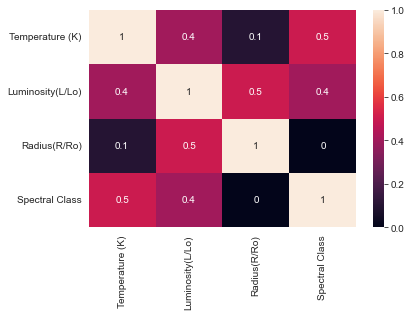

In [3]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True
)

In [4]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop("Spectral Class", axis=1),
    dataset["Spectral Class"],
    test_size=0.2
)

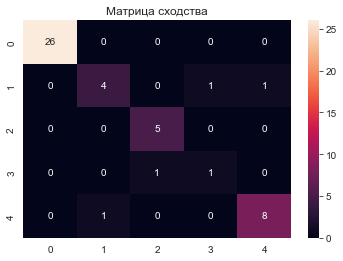

In [5]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)

sns.heatmap(
    confusion_matrix,
    annot=True
)
plt.title('Матрица сходства')

plt.savefig("Рис 9.jpg")

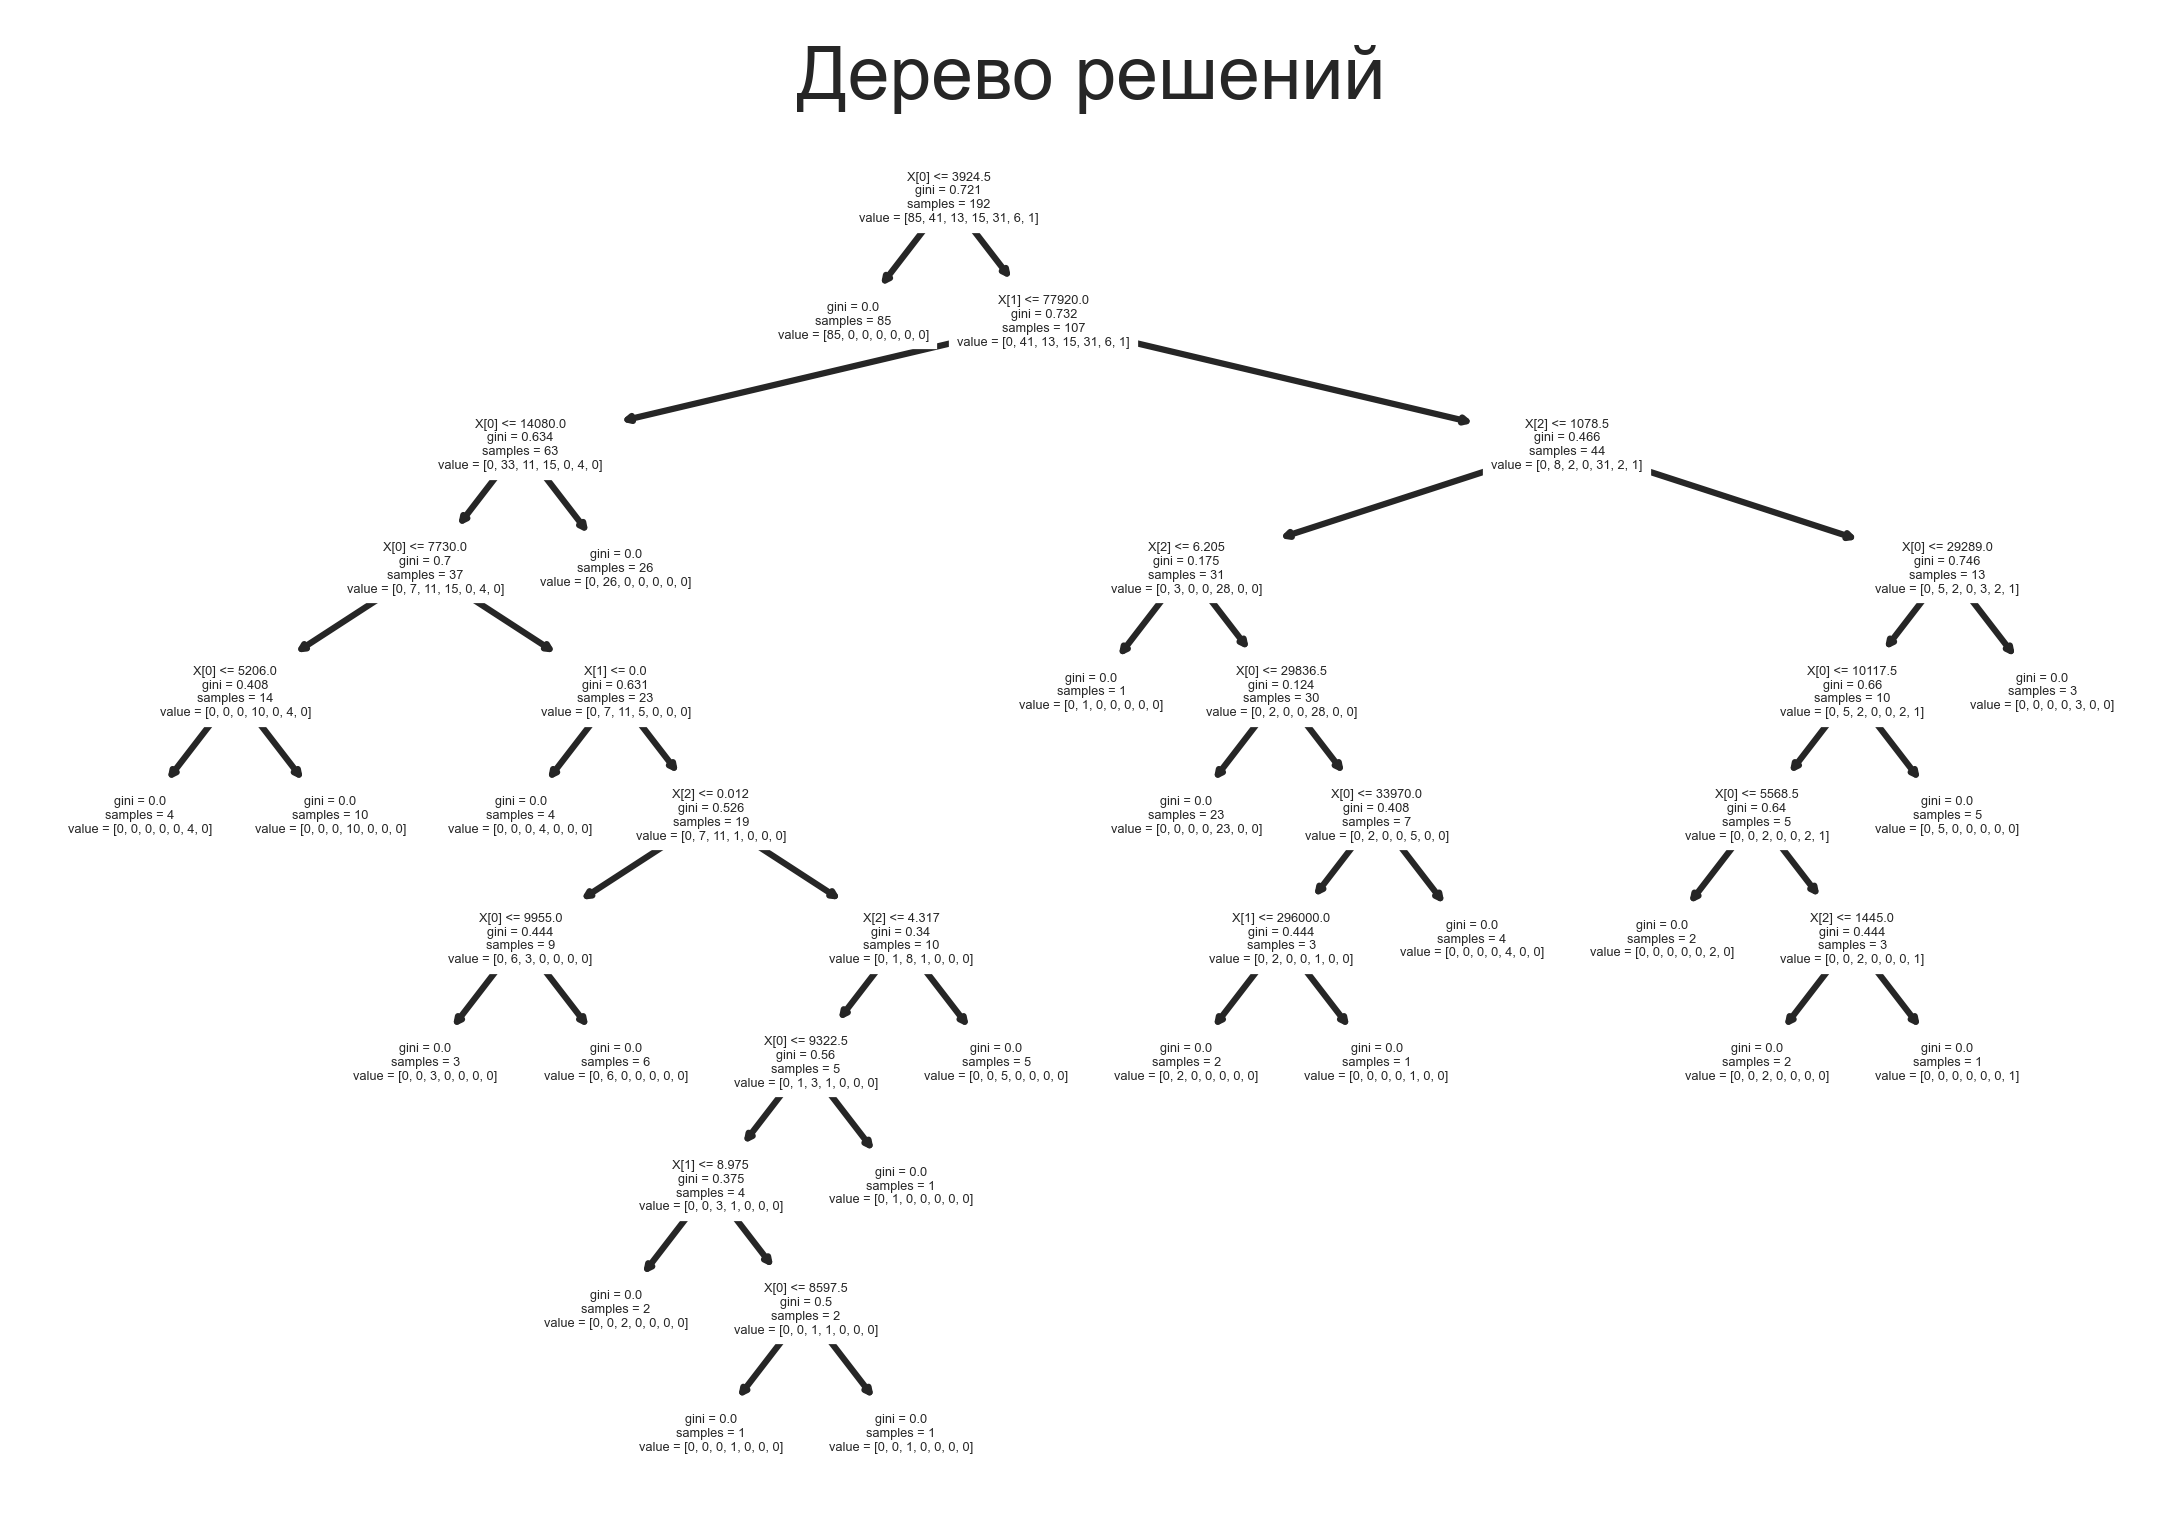

In [6]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")
plt.savefig("Рис 10.jpg")